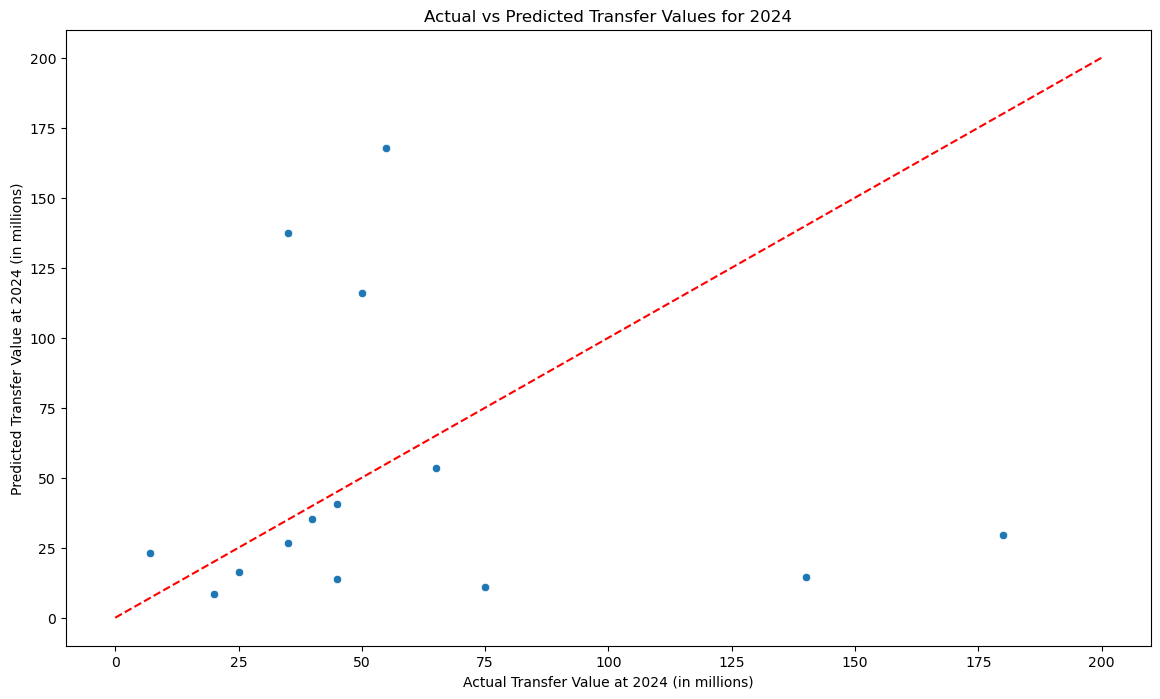

                  Player  Actual Transfer Value at 2024  \
0         Erling Haaland                          180.0   
1         Alexander Isak                           75.0   
2          Ollie Watkins                           65.0   
3        Dominic Solanke                           40.0   
4          Mohamed Salah                           55.0   
5          Son Heung-Min                           45.0   
6            Bukayo Saka                          140.0   
7           Jarrod Bowen                           50.0   
8   Jean-Philippe Mateta                           20.0   
9        Nicolas Jackson                           35.0   
10            Chris Wood                            7.0   
11         Matheus Cunha                           45.0   
12        Hwang Hee-Chan                           25.0   
13      Leandro Trossard                           35.0   

    Predicted Transfer Value at 2024       Error  
0                          29.600498  150.399502  
1           

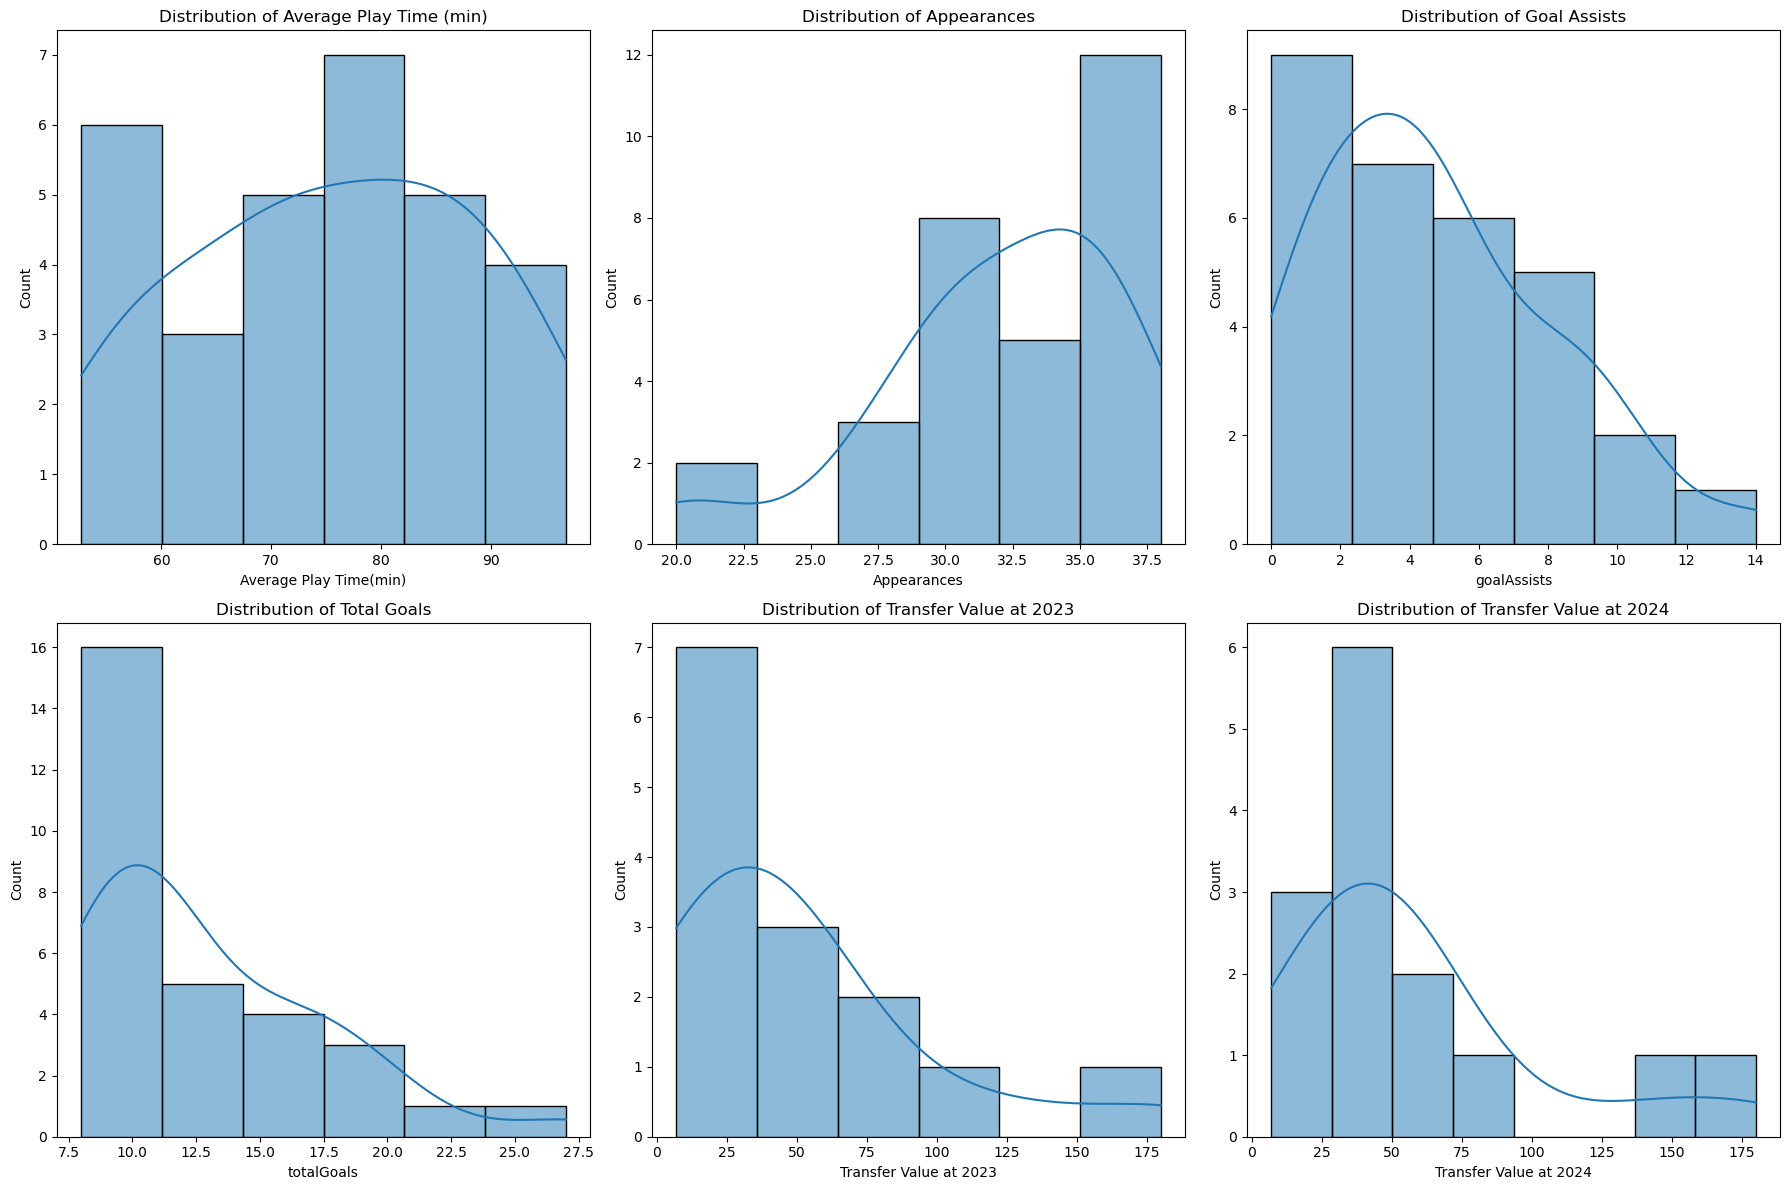

,Average Play Time(min),Appearances,goalAssists,totalGoals,Transfer Value at 2023,Transfer Value at 2024
count,30.000000,30.000000,30.000000,30.000000,14.000000,14.000000
mean,75.464128,32.033333,4.733333,12.833333,51.071429,58.357143
std,13.163300,4.506572,3.382851,4.639287,47.865941,47.126029
min,52.685714,20.000000,0.000000,8.000000,7.000000,7.000000
25%,66.520471,30.000000,2.000000,9.250000,21.250000,35.000000
50%,76.581081,32.500000,4.000000,11.000000,36.500000,45.000000
75%,86.600223,35.000000,6.750000,16.000000,62.500000,62.500000
max,96.852941,38.000000,14.000000,27.000000,180.000000,180.000000


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
import numpy as np

# Importing the DATA file
file_path = '/Users/ultra/OneDrive/Masaüstü/DATA.xlsx'
data = pd.read_excel(file_path)

# Converting transfer values to numeric in order to get better results
def convert_transfer_value(value):
    try:
        return float(value.replace(' M', ''))
    except:
        return np.nan

# Applying conversion function to transfer value columns
data['Transfer Value at 2023'] = data['Transfer Value at 2023'].apply(convert_transfer_value)
data['Transfer Value at 2024'] = data['Transfer Value at 2024'].apply(convert_transfer_value)

# Removing rows with non-finite values in the transfer value columns
clean_data = data.dropna(subset=['Transfer Value at 2023', 'Transfer Value at 2024'])
clean_data = clean_data.dropna(subset=numeric_columns)

# ***APPLYING THE GAMMA DISTRIBUTION FUNCTION***

# Setting Gamma Distribution to the cleaned 2023 transfer values
shape, loc, scale = gamma.fit(clean_data['Transfer Value at 2023'])

# Predicting transfer values for 2024 using the fitted Gamma Distribution
predicted_values = gamma.rvs(shape, loc=loc, scale=scale, size=len(clean_data))

# Comparion between predicted values and actual 2024 values
comparison_df = pd.DataFrame({
    'Player': clean_data['Name'],
    'Actual Transfer Value at 2024': clean_data['Transfer Value at 2024'],
    'Predicted Transfer Value at 2024': predicted_values
})

# Calculation of mean absolute error (MAE) as a performance metric
comparison_df['Error'] = np.abs(comparison_df['Actual Transfer Value at 2024'] - comparison_df['Predicted Transfer Value at 2024'])
mae = comparison_df['Error'].mean()

# Plotting the comparison
plt.figure(figsize=(14, 8))
sns.scatterplot(data=comparison_df, x='Actual Transfer Value at 2024', y='Predicted Transfer Value at 2024')
plt.plot([0, 200], [0, 200], '--', color='red')  # Diagonal line for reference
plt.title('Actual vs Predicted Transfer Values for 2024')
plt.xlabel('Actual Transfer Value at 2024 (in millions)')
plt.ylabel('Predicted Transfer Value at 2024 (in millions)')
plt.show()

# Displaying comparison and MAE
print(comparison_df)
print(f"Mean Absolute Error (MAE): {mae}")

# ***Graphs of Distribution of players' statistics***

# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Average Play Time
sns.histplot(data['Average Play Time(min)'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Average Play Time (min)')

# Appearances
sns.histplot(data['Appearances'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Appearances')

# Goal Assists
sns.histplot(data['goalAssists'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Goal Assists')

# Total Goals
sns.histplot(data['totalGoals'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Total Goals')

# Transfer Value at 2023
sns.histplot(data['Transfer Value at 2023'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Transfer Value at 2023')

# Transfer Value at 2024
sns.histplot(data['Transfer Value at 2024'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Transfer Value at 2024')

plt.tight_layout()
plt.show()


summary_stats